# Data preprocessing

## iris dataset

<img src="http://www.snrazavi.ir/imgs/iris.png" width="70%">

[**view dataset in UCI ML Library**](https://archive.ics.uci.edu/ml/datasets/Iris)

[**view dataset in kaggle**](https://www.kaggle.com/uciml/iris)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

In [2]:
print("mean :               %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean :               [5.88660714 3.05178571 3.79642857 1.22321429] 
standard deviation : [0.86741565 0.43424445 1.79264014 0.77793019] 


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [4]:
print("mean :               %s " % X_train_scaled.mean(axis=0).round(8))
print("standard deviation : %s " % X_train_scaled.std(axis=0).round(8))

mean :               [ 0. -0.  0. -0.] 
standard deviation : [1. 1. 1. 1.] 


In [5]:
first = iris.data[0]
first_scaled = scaler.transform(iris.data[0:1]).round(1)[0]
first_rescaled =  scaler.inverse_transform(first_scaled).round(1)
print("First sample before  transforming : ", first)
print("First sample after   transforming : ", first_scaled)
print("First sample inverse transforming : ", first_rescaled)

First sample before  transforming :  [5.1 3.5 1.4 0.2]
First sample after   transforming :  [-0.9  1.  -1.3 -1.3]
First sample inverse transforming :  [5.1 3.5 1.5 0.2]


In [6]:
from sklearn.neural_network import MLPClassifier

kwargs = dict(hidden_layer_sizes=(5, 3, 2), activation = 'relu', max_iter = 500, random_state=1)


# classify iris without Standardization
clf = MLPClassifier(**kwargs).fit(X_train,y_train)
without_Standardization = clf.score(X_test,y_test)


# classify iris after Standardization
clf = MLPClassifier(**kwargs).fit(X_train_scaled,y_train)
with_Standardization = clf.score(X_test_scaled,y_test)


print('Accuracy before Standardization: {:2d}%'.format(int(without_Standardization*100)))
print('Accuracy after  Standardization: {:2d}%'.format(int(with_Standardization*100)))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy before Standardization: 26%
Accuracy after  Standardization: 97%


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## internet advertisements

<img src='https://archive.ics.uci.edu/ml/assets/MLimages/Large51.jpg'>

[**view dataset in UCI ML Library**](https://archive.ics.uci.edu/ml/datasets/Internet+Advertisements)

[**view dataset in kaggle**](https://www.kaggle.com/uciml/internet-advertisements-data-set)

In [7]:
import pandas as pd
import numpy as np

In [8]:
data =  pd.read_csv('add.csv')
data = data.replace(r'^\s*\?\s*$', np.nan,regex=True)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data.shape

(3279, 1560)

In [10]:
data.head(11)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,0,125,125,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,3,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,4,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,5,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,6,59,460,7.7966,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,7,60,234,3.9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,8,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,9,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [11]:
print('first 3 columns nulls: \n',data.iloc[:,1:4].isnull().sum())
print()
print('sum of all other colums nulls: ',data.iloc[:,4:].isnull().sum().sum())

first 3 columns nulls: 
 0    903
1    901
2    910
dtype: int64

sum of all other colums nulls:  15


In [12]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.decomposition import PCA

In [13]:
# data.dropna(inplace=True)

In [14]:
X = data.iloc[:,1:-1]
Y = np.array(data.iloc[:,-1])

del data

In [15]:
encoder = LabelBinarizer().fit(Y)
y = encoder.transform(Y)

In [16]:
indx = np.random.randint(0,y.shape[0],7)
print(Y[indx])
print(y[indx].flatten())

['nonad.' 'nonad.' 'nonad.' 'nonad.' 'nonad.' 'ad.' 'ad.']
[1 1 1 1 1 0 0]


In [17]:
X.iloc[:,:3] = X.iloc[:,:3].astype(float)
X.iloc[:,3:] = X.iloc[:,3:].astype(bool)

# replace null values with mean of all other rows in this field
X.iloc[:,:3] = X.iloc[:,:3].replace(np.NaN,X.iloc[:,:3].mean())

In [18]:
X.iloc[:,:3] = StandardScaler().fit_transform(X.iloc[:,:3])

In [19]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,1.305837,-0.274088,-0.567039,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.150373,2.824037,0.837047,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.664329,0.674318,0.595409,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.086128,2.824037,0.757111,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.086128,2.824037,0.757111,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
pca = PCA(0.98, random_state=0).fit(X)
X_new = pca.transform(X)

In [21]:
print('dimension before PCA is %s and after PCA is %s' % (X.shape[1],X_new.shape[1]))
print('reduction ratio is: %.2f'%(X_new.shape[1]/X.shape[1]))

dimension before PCA is 1558 and after PCA is 349
reduction ratio is: 0.22


In [22]:
# pca.components_
# pca.singular_values_

In [23]:
# Neural Network Artichecture

kwargs = dict(hidden_layer_sizes=(200,100,50,25), activation = 'relu', max_iter = 200, random_state=1)

# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [25]:
import time
from sklearn.neural_network import MLPClassifier

tic1 = time.time()
clf = MLPClassifier(**kwargs).fit(X_train, y_train)
toc1 = time.time()

score1 = clf.score(X_test, y_test)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25,stratify=y, random_state=0)

In [27]:
tic2 = time.time()
clf = MLPClassifier(**kwargs).fit(X_train, y_train)
toc2 = time.time()

score2 = clf.score(X_test, y_test)

In [28]:
print('Classification score before Standardization and PCA is {:.2f}% in {:.2f} seconds'.format(round(score1*100,2),toc1-tic1))

print('Classification score after  Standardization and PCA is {:.2f}% in {:.2f} seconds'.format(round(score2*100,2),toc2-tic2))

print('time efficiency: %.1f'% round((toc1-tic1)/(toc2-tic2),1))

Classification score before Standardization and PCA is 97.44% in 9.74 seconds
Classification score after  Standardization and PCA is 97.68% in 4.54 seconds
time efficiency: 2.1


## Horse Colic Data Set 

<img src='https://archive.ics.uci.edu/ml/assets/MLimages/Large47.jpg'>

[**view dataset in UCI ML Library**](https://archive.ics.uci.edu/ml/datasets/Horse+Colic)

[**view dataset in kaggle**](https://www.kaggle.com/uciml/horse-colic)

In [29]:
import re
with open('horse-colic/horse-colic.names') as f:
    data = f.read()
    cols = re.findall(r'\d+:\s*([a-zA-Z0-9 ]*)',data)
    cols = list(map(str.strip,cols))
cols.insert(24,cols[24])
cols.insert(24,cols[24])
print(cols)

['surgery', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion', 'type of lesion', 'type of lesion', 'type of lesion', 'cp']


In [30]:
df = pd.read_csv('horse-colic/horse-colic.data', delimiter=' ', header=None, names = cols)
df = df.replace(r'^\s*\?\s*$', np.nan, regex=True)

df_test = pd.read_csv('horse-colic/horse-colic.test', delimiter=' ', header=None, names = cols)
df_test = df_test.replace(r'^\s*\?\s*$', np.nan, regex=True)

df.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion,type of lesion.1,type of lesion.2,cp
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2


In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent').fit(df)
df = imputer.transform(df)
df_test = imputer.transform(df_test)

df = pd.DataFrame(df, columns=cols)
df.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion,type of lesion,type of lesion,cp
0,2,1,530101,38.50,66,28,3,3,1,2,...,45.00,8.40,2,2,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,3,1,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,2,2,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,3,1,6,2,...,74.00,7.40,2,2,2,2,4300,0,0,2


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
df = scaler.transform(df)
df_test = scaler.transform(df_test)

df = pd.DataFrame(df, columns=cols)
df_test = pd.DataFrame(df_test, columns=cols)

df.head()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion,type of lesion,type of lesion,cp
0,1.0,0.0,0.002428,0.574074,0.233766,0.227273,0.666667,0.666667,0.0,0.5,...,0.423077,0.059510,0.5,0.19,0.5,1.0,0.274872,0.0,0.0,1.0
1,0.0,0.0,0.003414,0.703704,0.376623,0.136364,0.666667,0.000000,0.6,0.0,...,0.519231,0.953326,0.5,0.19,1.0,1.0,0.053710,0.0,0.0,1.0
2,1.0,0.0,0.002477,0.537037,0.064935,0.181818,0.000000,0.000000,0.4,0.0,...,0.192308,0.039673,0.5,0.19,0.0,1.0,0.000000,0.0,0.0,0.0
3,0.0,1.0,0.996821,0.685185,0.870130,0.863636,1.000000,0.000000,1.0,0.5,...,0.480769,0.045508,1.0,0.52,0.5,0.0,0.053710,0.0,0.0,0.0
4,1.0,0.0,0.002461,0.351852,0.480519,0.306818,0.666667,0.000000,1.0,0.5,...,0.980769,0.047841,0.5,0.19,0.5,1.0,0.104597,0.0,0.0,1.0


In [33]:
from sklearn.neighbors import KNeighborsClassifier

X_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [34]:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

knn_accuracy = model.score(X_test,y_test)

In [35]:
model = MLPClassifier(hidden_layer_sizes=(30,20,10,5),activation='tanh', max_iter=500,learning_rate_init=0.01,random_state=10)
model.fit(X_train, y_train)
mlp_accuracy = model.score(X_test,y_test)

In [36]:
print('KNN Classification score is {:.2f}%'.format(round(100*knn_accuracy,2)))
print('MLP Classification score is {:.2f}%'.format(round(100*mlp_accuracy,2)))

KNN Classification score is 63.24%
MLP Classification score is 76.47%


## Plants dataset

<img src='https://archive.ics.uci.edu/ml/assets/MLimages/Large180.jpg'>

[**view dataset in UCI ML Library**](https://archive.ics.uci.edu/ml/datasets/Plants)

In [37]:
with open('plants/plants.data', encoding="ISO-8859-1") as f:
    data = f.read().strip().split('\n')
    data = list(map(lambda x:x.strip().split(','),data))

In [38]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(data)
len(te.columns_)

34851

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch

# Memory Error

# df = pd.DataFrame(te_ary,columns=te.columns_)
# df.head()

# df = PCA(0.5).fit_transform(df)
# clusters = KMeans().fit(df)
# clusters.transform(df)
# clusters.predict(df)

## Absenteeism at work

[**view dataset in UCI ML Library**](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)

In [40]:
df = pd.read_csv('absenteeism/Absenteeism_at_work.csv', delimiter=';')
cols = list(df)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [41]:
# cols: Weight Height Body_mass_index
# redundancy

In [42]:
df.drop(columns=['Weight','Height'],inplace=True)
cols.remove('Weight')
cols.remove('Height')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2


In [43]:
from sklearn.preprocessing import RobustScaler
df = RobustScaler().fit_transform(df)

df = pd.DataFrame(df,columns=cols)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,-0.368421,0.230769,0.166667,-0.5,-1.0,0.790123,0.294118,0.000000,-0.444444,-0.495585,0.5,0.0,0.0,0.5,0.0,0.0,1.0,0.714286,0.166667
1,0.947368,-1.769231,0.166667,-0.5,-1.0,-1.320988,-0.382353,0.714286,1.444444,-0.495585,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.857143,-0.500000
2,-0.789474,0.000000,0.166667,0.0,-1.0,-0.567901,0.735294,0.714286,0.111111,-0.495585,0.5,0.0,0.0,-0.5,0.0,0.0,0.0,0.857143,-0.166667
3,-0.578947,-1.230769,0.166667,0.5,-1.0,0.666667,-0.617647,0.142857,0.222222,-0.495585,0.5,0.0,0.0,0.5,0.0,1.0,0.0,-0.142857,0.166667
4,-0.368421,0.000000,0.166667,0.5,-1.0,0.790123,0.294118,0.000000,-0.444444,-0.495585,0.5,0.0,0.0,0.5,0.0,0.0,1.0,0.714286,-0.166667


In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

n_classes = np.unique(y).shape[0]
print("number of classes: ",np.unique(y).shape[0])

for i,j in enumerate(np.unique(y),1000):
    df.iloc[:,-1] = df.iloc[:,-1].replace(j,i)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

df.head()

number of classes:  19


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,-0.368421,0.230769,0.166667,-0.5,-1.0,0.790123,0.294118,0.000000,-0.444444,-0.495585,0.5,0.0,0.0,0.5,0.0,0.0,1.0,0.714286,1004.0
1,0.947368,-1.769231,0.166667,-0.5,-1.0,-1.320988,-0.382353,0.714286,1.444444,-0.495585,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.857143,1000.0
2,-0.789474,0.000000,0.166667,0.0,-1.0,-0.567901,0.735294,0.714286,0.111111,-0.495585,0.5,0.0,0.0,-0.5,0.0,0.0,0.0,0.857143,1002.0
3,-0.578947,-1.230769,0.166667,0.5,-1.0,0.666667,-0.617647,0.142857,0.222222,-0.495585,0.5,0.0,0.0,0.5,0.0,1.0,0.0,-0.142857,1004.0
4,-0.368421,0.000000,0.166667,0.5,-1.0,0.790123,0.294118,0.000000,-0.444444,-0.495585,0.5,0.0,0.0,0.5,0.0,0.0,1.0,0.714286,1002.0


In [45]:
from sklearn.neural_network import MLPClassifier

mdl = MLPClassifier(hidden_layer_sizes=(70,40,30,20,10),max_iter=500,random_state=1).fit(X, y)

predicted = mdl.score(X,y)
print('Classification score before Standardization and PCA is {:.2f}%'.format(round(predicted*100,2)))

Classification score before Standardization and PCA is 93.11%


## digits dataset

<img src='http://www.snrazavi.ir/imgs/digits.png' width='50%'/>

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
%matplotlib inline

digits = load_digits()

X, y = digits.data, digits.target

In [47]:
from sklearn.decomposition import PCA

pca = PCA(0.99, random_state=0)
pca.fit(X)
X_pca = pca.transform(X)

print("Dataset dimention before PCA: ", X.shape[1])
print("Dataset dimention after  PCA: ", X_pca.shape[1])

Dataset dimention before PCA:  64
Dataset dimention after  PCA:  41


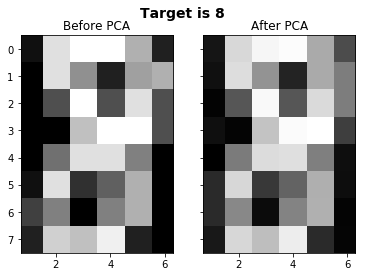

In [48]:
img_num = np.random.randint(0,X.shape[0])
tmp = X[img_num].reshape(8, 8)
tmp_inv = pca.inverse_transform(X_pca[img_num]).reshape(8,8)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Target is %s' % (y[img_num]), fontsize=14, fontweight='bold')
ax1.imshow(tmp,cmap='gray')
ax2.imshow(tmp_inv,cmap='gray')
ax1.set_title('Before PCA')
ax2.set_title('After PCA')
print()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=0)

In [50]:
import time
from sklearn.neural_network import MLPClassifier

kwargs = dict(hidden_layer_sizes=(30, 25,20, 20, 10), activation = 'relu', max_iter = 150, random_state=1)

# classify digits without pca
tic1 = time.time()
clf = MLPClassifier(**kwargs).fit(X_train, y_train)
without_pca = clf.score(X_test, y_test)
toc1 = time.time()

time.sleep(.2)

# classify digits after pca
tic2 = time.time()
clf = MLPClassifier(**kwargs).fit(X_train_pca, y_train_pca)
with_pca = clf.score(X_test_pca, y_test_pca)
toc2 = time.time()



print('Accuracy before PCA: {:2d}% in {:.2f}s'.format(int(without_pca*100),toc1-tic1))
print('Accuracy after  PCA: {:2d}% in {:.2f}s'.format(int(with_pca*100),toc2-tic2))

Accuracy before PCA: 93% in 2.41s
Accuracy after  PCA: 95% in 1.31s


## Combining Standardization and PCA

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X,y = digits.data,digits.target

X = MinMaxScaler().fit_transform(X)

X = PCA(0.99, random_state=0).fit_transform(X)

print('New dimension after PCA is %s' % X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=0)

clf = MLPClassifier(hidden_layer_sizes=(30, 25, 15, 10), activation = 'tanh', max_iter = 500, random_state=1).fit(X_train, y_train)

score = clf.score(X_test, y_test)

print('Classification score after Standardization and PCA is {:.2f}%'.format(round(score*100,2)))

New dimension after PCA is 44
Classification score after Standardization and PCA is 97.11%


## Convolutional Neural Networks

In [52]:
import numpy as np
import tensorflow as tf
np.random.seed(1)
tf.set_random_seed(1)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split



Using TensorFlow backend.


In [53]:
digits = load_digits()
X, y = digits.data, digits.target

nClasses = len(np.unique(y))

X /= np.array(X).max().max()
X = X.reshape(-1,8,8,1)

y = keras.utils.to_categorical(y)

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1,stratify=y)

In [54]:
model = Sequential()

model.add(Conv2D(25, 3,padding='same' ,input_shape=train_X[0].shape))
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(50, 3,padding='same'))

model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(2))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(200, activation='sigmoid'))

model.add(Dense(100, activation='sigmoid'))

model.add(Dense(50, activation='sigmoid'))

model.add(Dense(25, activation='sigmoid'))

model.add(Dense(nClasses, activation='sigmoid'))

In [55]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [56]:
train = model.fit(train_X, train_Y, batch_size=128,epochs=22,verbose=1)

Epoch 1/22
1617/1617 [==============================] - 1s 752us/step - loss: 2.3169 - acc: 0.1014
Epoch 2/22
1617/1617 [==============================] - 1s 442us/step - loss: 2.2716 - acc: 0.1014
Epoch 3/22
1617/1617 [==============================] - 1s 444us/step - loss: 2.2253 - acc: 0.1552
Epoch 4/22
1617/1617 [==============================] - 1s 451us/step - loss: 2.1657 - acc: 0.3488
Epoch 5/22
1617/1617 [==============================] - 1s 447us/step - loss: 2.0941 - acc: 0.4985
Epoch 6/22
1617/1617 [==============================] - 1s 456us/step - loss: 2.0143 - acc: 0.6190
Epoch 7/22
1617/1617 [==============================] - 1s 443us/step - loss: 1.9293 - acc: 0.7910
Epoch 8/22
1617/1617 [==============================] - 1s 459us/step - loss: 1.8448 - acc: 0.8126
Epoch 9/22
1617/1617 [==============================] - 1s 453us/step - loss: 1.7591 - acc: 0.8052
Epoch 10/22
1617/1617 [==============================] - 1s 456us/step - loss: 1.6746 - acc: 0.8349
Epoch 11/

In [57]:
_, acc = model.evaluate(test_X, test_Y)

print('Classification score using CNN: {:.2f}%'.format(round(acc*100,2)))

180/180 [==============================] - 0s 692us/step
Classification score using CNN: 100.00%
